Kütüphanelerin import edilmesi.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from time import time
from keras.models import Sequential
from keras.layers import Dense, Dropout
import seaborn as sns
import matplotlib.pyplot as plt


Veri setinin, kolon isimleri Türkçeleştirilerek çekilmesi.

In [2]:
df=pd.read_csv('bank-additional-full.csv', sep=';',)
df.columns = ['yas', 'meslek', 'medeni_hal', 'egitim_durumu','temerrud_durumu','ev_durumu','borc_durumu','iletisim_tipi', 'ay', 'gun',
              'son_gorusme','kampanya_musteri_sayisi', 'son_kampanya_gorusme', 'bu_kampanya_son_gorusme','onceki_kampanya_sonuc',
               'is_degisim_orani','tuketici_fiyat_endeksi', 'tuketici_guven_endeksi', 'euribor_oran', 'calisan_sayisi', 'uygun_mu']
df.head()

,yas,meslek,medeni_hal,egitim_durumu,temerrud_durumu,ev_durumu,borc_durumu,iletisim_tipi,ay,gun,...,kampanya_musteri_sayisi,son_kampanya_gorusme,bu_kampanya_son_gorusme,onceki_kampanya_sonuc,is_degisim_orani,tuketici_fiyat_endeksi,tuketici_guven_endeksi,euribor_oran,calisan_sayisi,uygun_mu
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.columns

Index(['yas', 'meslek', 'medeni_hal', 'egitim_durumu', 'temerrud_durumu',
       'ev_durumu', 'borc_durumu', 'iletisim_tipi', 'ay', 'gun', 'son_gorusme',
       'kampanya_musteri_sayisi', 'son_kampanya_gorusme',
       'bu_kampanya_son_gorusme', 'onceki_kampanya_sonuc', 'is_degisim_orani',
       'tuketici_fiyat_endeksi', 'tuketici_guven_endeksi', 'euribor_oran',
       'calisan_sayisi', 'uygun_mu'],
      dtype='object')

Krediye uygunluk dağılımı pasta grafiği ve bar grafiği ile bastırıldı.

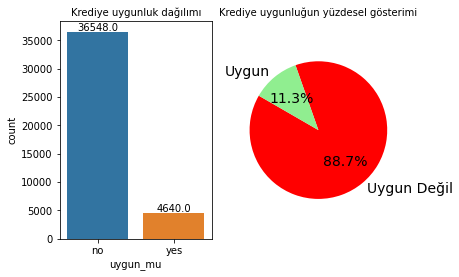

In [4]:
plt.rcParams['figure.figsize']=15,5
plt.subplot(121)
plt.title('Krediye uygunluk dağılımı', fontsize=10)
s = sns.countplot(x="uygun_mu", data=df)
for p in s.patches:
    s.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 4), 
                textcoords = 'offset points')

ax = plt.subplot(122)
mush_classpie = df['uygun_mu'].value_counts()
mush_size = mush_classpie.values.tolist()
mush_types = mush_classpie.axes[0].tolist()
mush_label1 = 'Uygun Değil'
mush_label2 = 'Uygun'
colors = ['Red', 'LightGreen']
plt.title('Krediye uygunluğun yüzdesel gösterimi', fontsize=10)
patches, texts, autotexts = plt.pie(mush_size, labels=(mush_label1, mush_label2), colors=colors,
        autopct='%.1f%%', shadow=False, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')  
plt.show()

Veri setindeki eğitim durumu bar grafik ile bastırıldı

<AxesSubplot:xlabel='egitim_durumu', ylabel='count'>

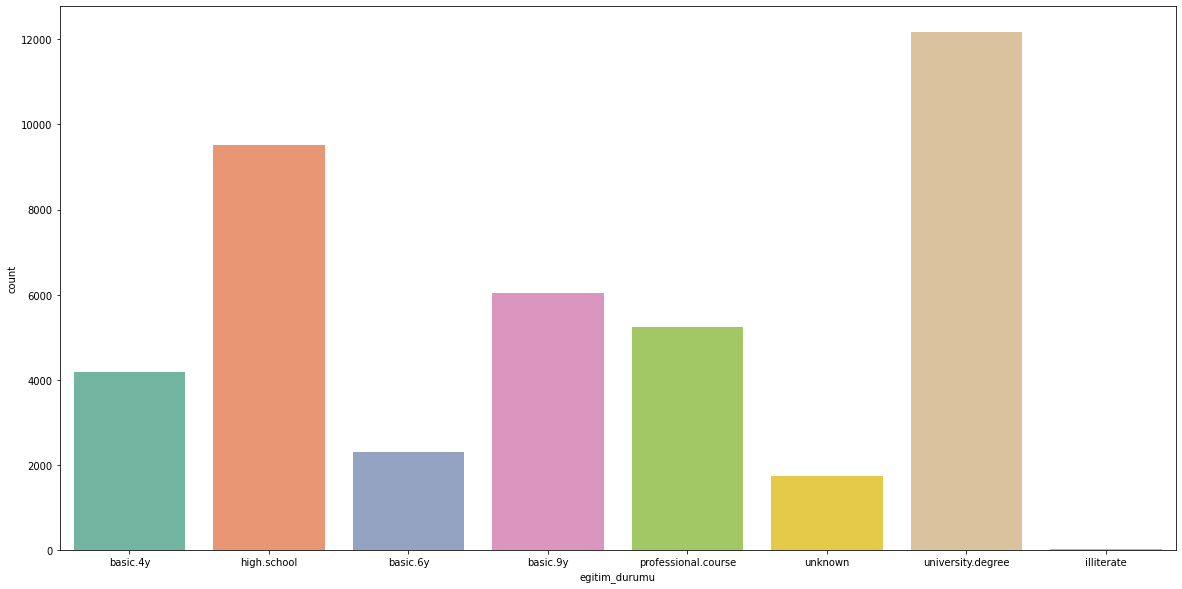

In [5]:
plt.figure(figsize=(20,10))
sns.countplot(x="egitim_durumu", data=df, palette="Set2")

Çalışan kişilerin eğitim düzeyi dağılımı bar grafik ile bastırıldı.

Text(0.5, 0, 'Meslek')

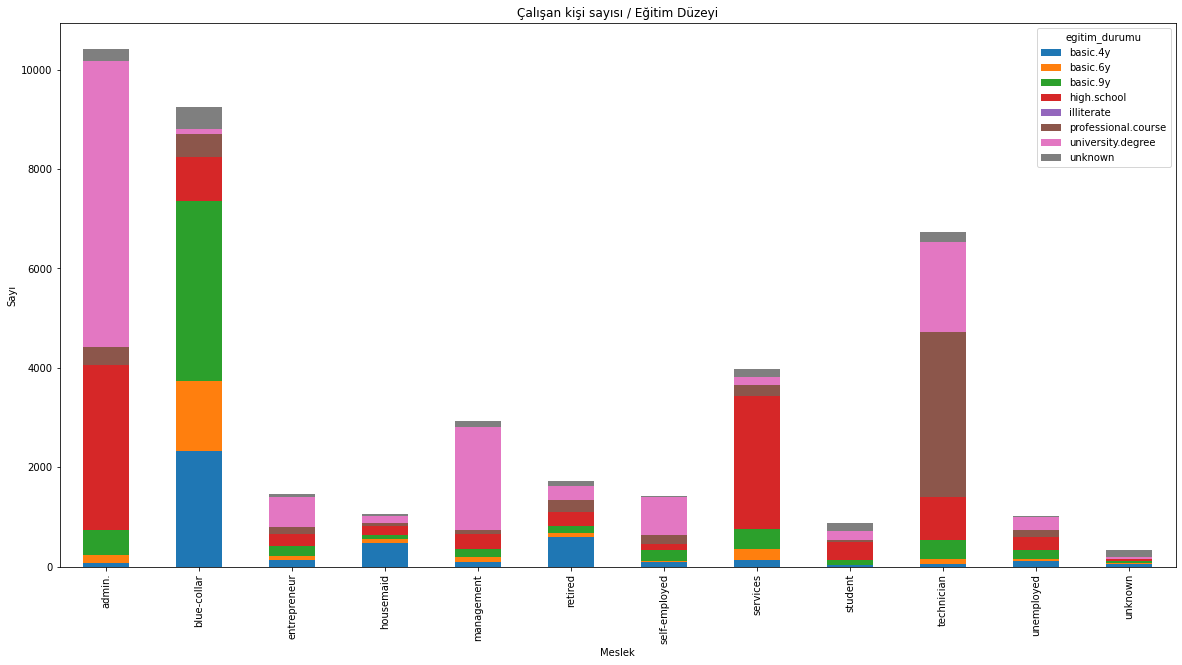

In [6]:
df_pivot=pd.pivot_table(df,columns='egitim_durumu', index='meslek', aggfunc='count', values='yas')
df_pivot.plot(kind='bar', stacked=True, figsize=(20,10), alpha=1)
plt.title('Çalışan kişi sayısı / Eğitim Düzeyi')
plt.ylabel('Sayı')
plt.xlabel('Meslek')

Veri setindeki verilerin yaş dağılımı grafik olarak bastırıldı.

Text(0, 0.5, 'Frekans')

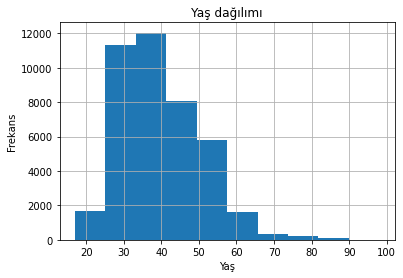

In [7]:
df.yas.hist()
plt.title("Yaş dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Frekans")

Veri setindeki verilerin temerrüd durumu bar grafik ile bastırıldı.

<AxesSubplot:xlabel='temerrud_durumu', ylabel='count'>

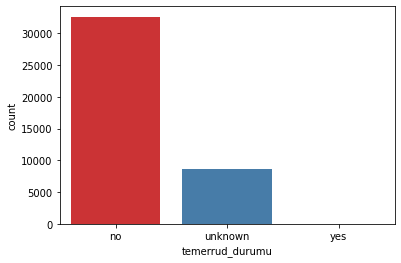

In [8]:
plt.figure()
sns.countplot(x="temerrud_durumu", data=df, palette="Set1")

Veri setindeki verilerin meslek durumuna göre krediye uygunluğu bar grafik olarak bastırıldı.

Text(0, 0.5, 'Uygun mu')

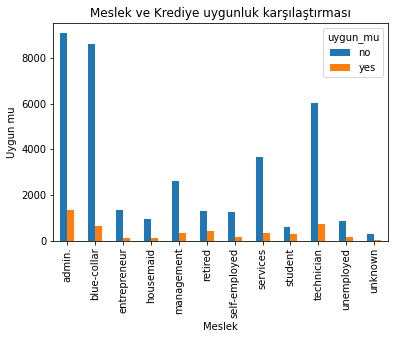

In [9]:
pd.crosstab(df.meslek, df.uygun_mu).plot(kind='bar')
plt.title("Meslek ve Krediye uygunluk karşılaştırması")
plt.xlabel("Meslek")
plt.ylabel("Uygun mu")

Veri setindeki verilerin borç durumu ve krediye uygunluğu bar grafik olarak bastırıldı.

Text(0, 0.5, 'Uygun mu')

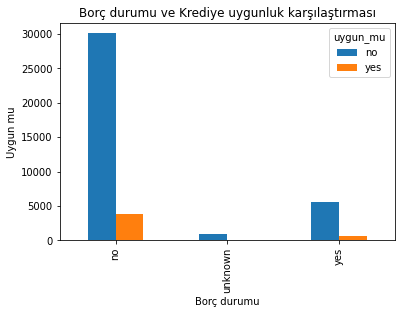

In [10]:
pd.crosstab(df.borc_durumu, df.uygun_mu).plot(kind='bar')
plt.title("Borç durumu ve Krediye uygunluk karşılaştırması")
plt.xlabel("Borç durumu")
plt.ylabel("Uygun mu")

describe() fonksiyonu sayısal veriler ile histogramik verileri basar.

In [11]:
df.describe()

,yas,son_gorusme,kampanya_musteri_sayisi,son_kampanya_gorusme,bu_kampanya_son_gorusme,is_degisim_orani,tuketici_fiyat_endeksi,tuketici_guven_endeksi,euribor_oran,calisan_sayisi
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Label Encoding işlemine başlandı.

In [12]:
dict_meslek = {
    "meslek":{
        "housemaid":1,
        "unemployed":0,
        "entrepreneur":1,
        "blue-collar":1,
        "services":1,
        "admin.":1,
        "technician":1,
        "retired":1,
        "management":1,
        "self-employed":1,
        "unknown":0,
        "student":0
    }}
dict_egitim_durumu = {
    "egitim_durumu":{
        "basic.4y":1,
        "basic.6y":1,
        "basic.9y":1,
        "high.school":1,
        "professional.course":1,
        "university.degree":1,
        "illiterate":0,
        "unknown":0
    }}

dict_onceki_kampanya_sonuc = {
    "onceki_kampanya_sonuc":{
        "nonexistent":0,
        "failure":0,
        "success":1
    }}
dict_uygun_mu = {
    "uygun_mu":{
        "no":0,
        "yes":1
    }}
for i in [dict_onceki_kampanya_sonuc,dict_uygun_mu, dict_egitim_durumu, dict_meslek]:
    df.replace(i,inplace=True)
df.head(5)

,yas,meslek,medeni_hal,egitim_durumu,temerrud_durumu,ev_durumu,borc_durumu,iletisim_tipi,ay,gun,...,kampanya_musteri_sayisi,son_kampanya_gorusme,bu_kampanya_son_gorusme,onceki_kampanya_sonuc,is_degisim_orani,tuketici_fiyat_endeksi,tuketici_guven_endeksi,euribor_oran,calisan_sayisi,uygun_mu
0,56,1,married,1,no,no,no,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,married,1,unknown,no,no,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,married,1,no,yes,no,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,married,1,no,no,no,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,married,1,no,no,yes,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


Label encoding işlemi devamı.

In [13]:
lc_X1 = LabelEncoder()
list = ['medeni_hal','temerrud_durumu','ev_durumu','borc_durumu']

for i in list:
    df[i] = lc_X1.fit_transform(df[i])
df_cor = pd.get_dummies(df,
                       columns=['medeni_hal','temerrud_durumu','ev_durumu','borc_durumu'],
                       drop_first=True)
df.head()

,yas,meslek,medeni_hal,egitim_durumu,temerrud_durumu,ev_durumu,borc_durumu,iletisim_tipi,ay,gun,...,kampanya_musteri_sayisi,son_kampanya_gorusme,bu_kampanya_son_gorusme,onceki_kampanya_sonuc,is_degisim_orani,tuketici_fiyat_endeksi,tuketici_guven_endeksi,euribor_oran,calisan_sayisi,uygun_mu
0,56,1,1,1,0,0,0,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,1,1,1,0,0,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,1,1,0,2,0,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,1,1,0,0,0,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,1,1,0,0,2,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


Veri setindeki çıktı kolonu olan 'uygun_mu' kolonu ile diğer kolonlar arasındaki korelasyon oranı hesaplandı.

In [14]:
korelasyon = df_cor.corr()
print(korelasyon['uygun_mu'].sort_values(axis=0, ascending=True))

calisan_sayisi            -0.354678
son_kampanya_gorusme      -0.324914
euribor_oran              -0.307771
is_degisim_orani          -0.298334
tuketici_fiyat_endeksi    -0.136211
temerrud_durumu_1         -0.099293
meslek                    -0.070073
kampanya_musteri_sayisi   -0.066357
medeni_hal_1              -0.043398
egitim_durumu             -0.022075
borc_durumu_2             -0.004466
temerrud_durumu_2         -0.003041
borc_durumu_1             -0.002270
ev_durumu_1               -0.002270
medeni_hal_3               0.005211
ev_durumu_2                0.011743
yas                        0.030399
medeni_hal_2               0.054133
tuketici_guven_endeksi     0.054878
bu_kampanya_son_gorusme    0.230181
onceki_kampanya_sonuc      0.316269
son_gorusme                0.405274
uygun_mu                   1.000000
Name: uygun_mu, dtype: float64


Korelasyon sayısı düşük olan kolonlar çıkarıldı.

In [15]:
df_cor.drop(columns=[
    'calisan_sayisi','son_kampanya_gorusme','euribor_oran','is_degisim_orani',
    'tuketici_fiyat_endeksi','iletisim_tipi','ay','kampanya_musteri_sayisi', 'gun'
    ], axis=0, inplace=True)

In [16]:
korelasyon_orani = df_cor.corr()
print(korelasyon_orani['uygun_mu'].sort_values(axis=0, ascending=True))

temerrud_durumu_1         -0.099293
meslek                    -0.070073
medeni_hal_1              -0.043398
egitim_durumu             -0.022075
borc_durumu_2             -0.004466
temerrud_durumu_2         -0.003041
borc_durumu_1             -0.002270
ev_durumu_1               -0.002270
medeni_hal_3               0.005211
ev_durumu_2                0.011743
yas                        0.030399
medeni_hal_2               0.054133
tuketici_guven_endeksi     0.054878
bu_kampanya_son_gorusme    0.230181
onceki_kampanya_sonuc      0.316269
son_gorusme                0.405274
uygun_mu                   1.000000
Name: uygun_mu, dtype: float64


Veri setinin eğitim ve test datası olarak parçalanması

In [17]:
X = df_cor.drop(columns = 'uygun_mu',axis=1).values
y = df_cor['uygun_mu'].values 

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [31]:
X_test.shape

(8238, 16)

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Confusion Matrisi kodu

In [32]:
def print_scores(model, labels, pred):

    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)    
    recall = round(recall_score(labels, pred), 3)
    f1 = round(f1_score(labels, pred), 3)
    
    cm = confusion_matrix(labels, pred)
    df = pd.DataFrame(cm)
    
    labels = [f"FN: {df[0][0]} ",f"FP: {df[1][1]} ",f"TN: {df[1][0]} ",f"TP: {df[0][1]} "]
    labels = np.asarray(labels).reshape(2,2)
    
    f, ax = plt.subplots(figsize=(6,5))
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', ax=ax)    
    print(f"{model}:: Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, f1_score: {f1}")

def print_cv_result(results):
    print(f"Best Params : {results.best_params_}\n")
    
    means = results.cv_results_['ortalama_skor']
    stds = results.cv_results_['standart_sapma_skor']
    
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print(f'{round(mean, 3)} (+/-{round(std * 2, 3)}) for {params}')

SVM algoritması

SVM:: Accuracy: 0.9, Precision: 0.667, Recall: 0.29, f1_score: 0.404


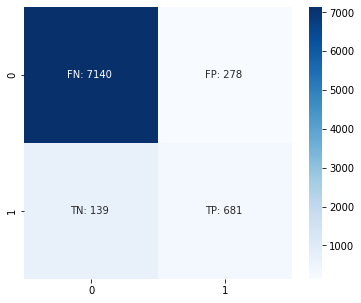

In [33]:
svc = SVC(kernel = "rbf", C=10)
svc.fit(X_train,y_train)
y_pred_svm = svc.predict(X_test)
print_scores("SVM", y_test, y_pred_svm)

Logistic Regression Algoritması

LGR:: Accuracy: 0.901, Precision: 0.667, Recall: 0.307, f1_score: 0.42


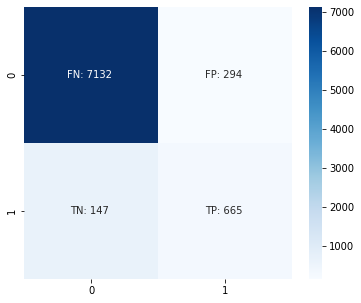

In [34]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
y_pred_lgr = lgr.predict(X_test)
print_scores("LGR", y_test, y_pred_lgr)

Artificial Neural Network

In [24]:
classifier = Sequential()
print(df_cor.shape)

(41188, 17)


In [37]:
classifier.add(Dense(units=16,
                     activation='relu',
                     kernel_initializer='uniform',
                     input_dim=16))

classifier.add(Dense(units=16,
                     activation='relu',
                     kernel_initializer='uniform'))

classifier.add(Dense(units=1,
                     activation='sigmoid',
                     kernel_initializer='uniform'))
classifier.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])
start = time()
classifier.fit(x=X_train, y=y_train, batch_size=10,epochs=5)

Epoch 1/5
3295/3295 [==============================] - 8s 2ms/step - loss: 0.3643 - accuracy: 0.8880
Epoch 2/5
3295/3295 [==============================] - 7s 2ms/step - loss: 0.3506 - accuracy: 0.8883
Epoch 3/5
3295/3295 [==============================] - 6s 2ms/step - loss: 0.3505 - accuracy: 0.8883
Epoch 4/5
3295/3295 [==============================] - 6s 2ms/step - loss: 0.3505 - accuracy: 0.8883
Epoch 5/5
3295/3295 [==============================] - 7s 2ms/step - loss: 0.3507 - accuracy: 0.8883
